In [1]:
from statsmodels.tsa.ar_model import AR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_render/nCoV_data_render.csv'
data = pd.read_csv(path)
data["Date"] = pd.to_datetime(data["Date"])
index_data = data.set_index(["Date"], drop=True)

# Check data
index_data.head(20)

,Total cases
Date,
2020-01-28,6061
2020-01-29,7816
2020-01-30,9821
2020-01-31,11948
2020-02-01,14551
2020-02-02,17387
2020-02-03,20047
2020-02-04,24553
2020-02-05,28276


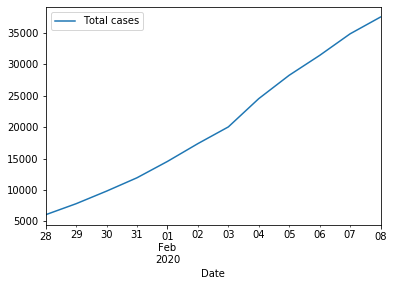

In [3]:
df = index_data[["Total cases"]]
df.plot()

In [9]:
# Autoregression
model = AR(df)
model_fit = model.fit()
predict = model_fit.predict(, len(data) - 1)

# MAPE Score
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100)

print(predict)
# print("MAPE score is: " + str(MAPE(test, predict)))

/Users/thainam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: Start must be >= k_ar for conditional MLE or dynamic forecast. Got 0

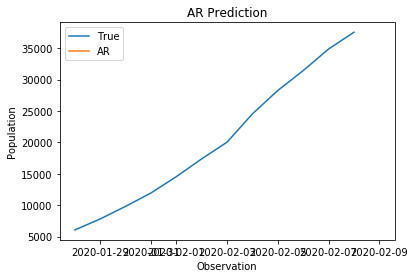

In [7]:
# Graphing
plt.plot(df, label='True')
plt.plot(predict, label='AR')
plt.title("AR Prediction")
plt.xlabel('Observation')
plt.ylabel('Population')
plt.legend()
plt.show()